In [187]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm

In [188]:
def plot_tested_func(tested_func, problem_ranges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data
    X = np.linspace(problem_ranges[0], problem_ranges[1], 100)
    Y = np.linspace(problem_ranges[0], problem_ranges[1], 100)

    X, Y = np.meshgrid(X, Y)
    Z = tested_func(X, Y)

    # Plot the surface
    surf = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=cm.PRGn,
        linewidth=0.08, antialiased=True,
    )

# CUCKOO SEARCH

In [189]:
def levy_flight():
    return math.pow(random.uniform(0.0001, 0.9999), -1.0 / 3.0)

In [190]:
def visualize_solution(population, problem_ranges):
    data = population[:, 0].copy()
    x = []
    y = []
    for i in range(len(population)):
        x.append(data[i][0])
        y.append(data[i][1])
    plt.plot(x, y, 'go')
    plt.axis([
        problem_ranges[0],
        problem_ranges[1],
        problem_ranges[0],
        problem_ranges[1],
    ])
    plt.show()

In [191]:
def cuckoo_search(problem_ranges, function, nest_count=200, probability=0.1, visualize=True):
    generation = 0 # current generation
    nests = [] # nests set
    fitness = [] # fitness set
    step_size = 1
    population = [] # [nests, fitness] set`
    # Init nests
    for i in range(nest_count):
        X = round(random.uniform(problem_ranges[0], problem_ranges[1]), 6)
        Y = round(random.uniform(problem_ranges[0], problem_ranges[1]), 6)
        fitness.append(round(function(X, Y),4))
        nests.append(np.array([X, Y]))

    population = np.array([nests, fitness])
    population = population.T
    population = population[np.argsort(population[:, 1])]
    if visualize: 
        print('Initialization: \n', population[0, 0], "\n", population[0, 1])
        visualize_solution(population, problem_ranges)

    result_list = []

    while generation < 10000:
        generation += 1
        # Get a cuckoo randomly by levy flight
        cuckoo_nest = population[random.randint(0, nest_count - 1), 0]
        levyX = levy_flight()
        levyY = levy_flight()
        cuckoo_nest = np.array([
            round(cuckoo_nest[0]+step_size*levyX, 6),
            round(cuckoo_nest[1]+step_size*levyY, 6),
        ])
        random_nest_index = random.randint(0, nest_count - 1)

        # Evaluate and replace
        if (population[random_nest_index, 1] > function(cuckoo_nest[0], cuckoo_nest[1])):
            population[random_nest_index, 0] = cuckoo_nest
            population[random_nest_index, 1] = function(cuckoo_nest[0], cuckoo_nest[1])

        # Probability of worse nests are abandoned and new ones built
        for i in range(nest_count - int(probability * nest_count), nest_count):
            X = round(random.uniform(problem_ranges[0], problem_ranges[1]), 6)
            Y = round(random.uniform(problem_ranges[0], problem_ranges[1]), 6)
            population[i, 0] = np.array([X, Y])
            population[i, 1] = round(function(X, Y), 4)
        population = population[np.argsort(population[:, 1])]

        if generation % 500 == 0:
            if visualize:
                print(generation, 'Generation of the optimal solution: \n', population[0, 1])
                visualize_solution(population, problem_ranges)
        result_list.append(population[0, 1])
    return result_list

# SPHERE FUCTION

In [192]:
problem_range = [-100, 100]

In [193]:
def sphere_func(x, y):
    # optimal point == min(0, 0) = 0
    z = x**2 + y**2
    return np.fabs(z)

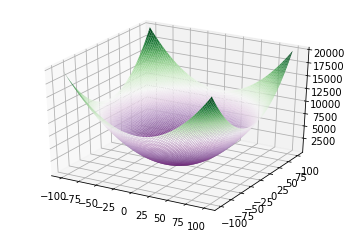

In [194]:
plot_tested_func(sphere_func, problem_range)

Initialization: 
 [-0.088261 -3.184878] 
 10.1512


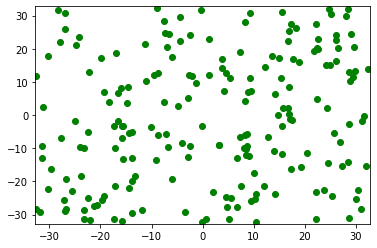

500 Generation of the optimal solution: 
 0.135993279857


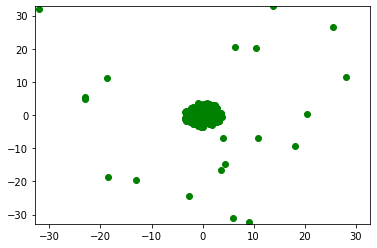

1000 Generation of the optimal solution: 
 0.017264370897


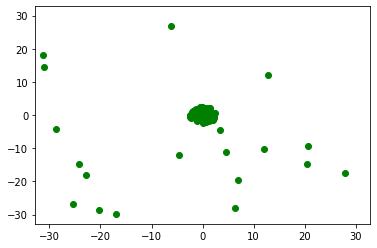

1500 Generation of the optimal solution: 
 0.017264370897


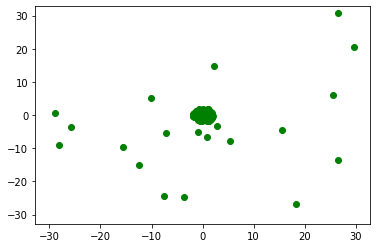

2000 Generation of the optimal solution: 
 0.0119


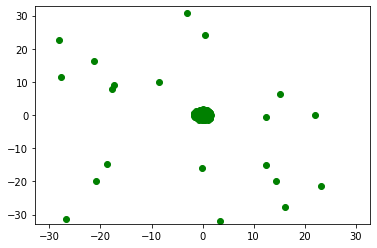

2500 Generation of the optimal solution: 
 0.0068


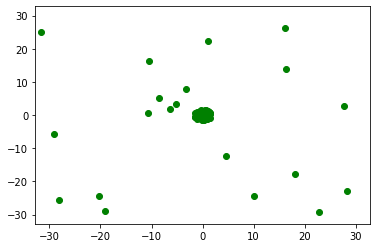

3000 Generation of the optimal solution: 
 0.0068


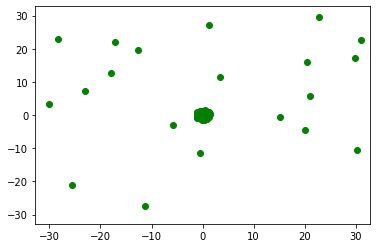

3500 Generation of the optimal solution: 
 0.0068


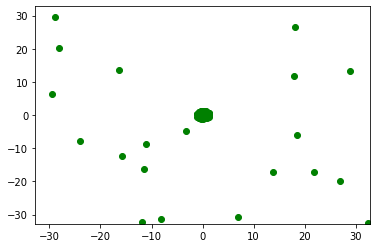

4000 Generation of the optimal solution: 
 0.0068


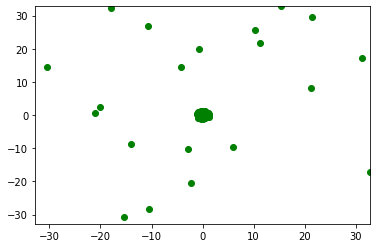

4500 Generation of the optimal solution: 
 0.0068


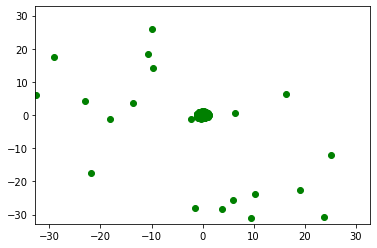

5000 Generation of the optimal solution: 
 0.0068


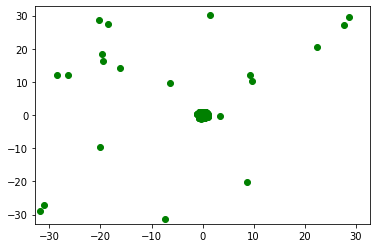

5500 Generation of the optimal solution: 
 0.0068


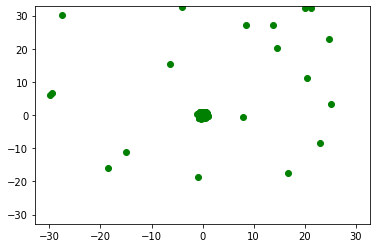

6000 Generation of the optimal solution: 
 0.0068


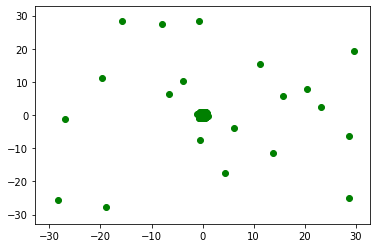

6500 Generation of the optimal solution: 
 0.0068


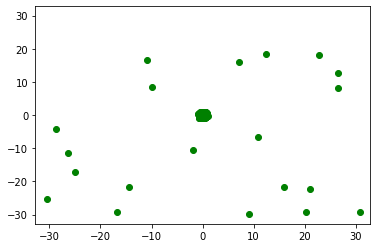

7000 Generation of the optimal solution: 
 0.0068


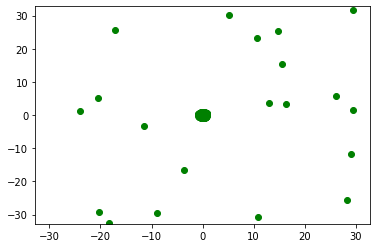

7500 Generation of the optimal solution: 
 0.0068


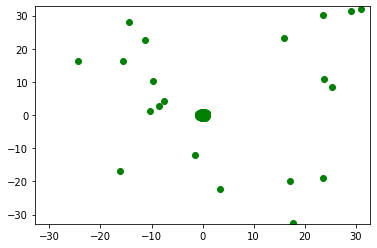

8000 Generation of the optimal solution: 
 0.0068


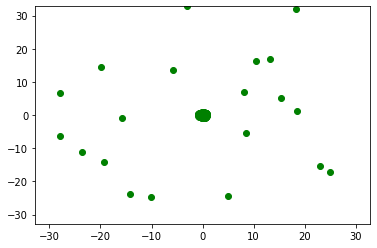

8500 Generation of the optimal solution: 
 0.0068


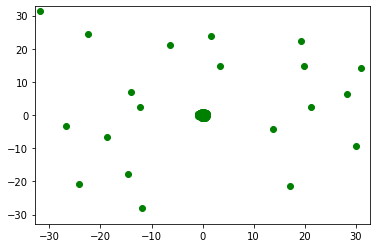

9000 Generation of the optimal solution: 
 0.0068


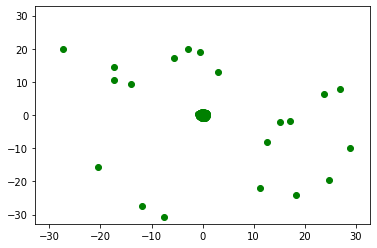

9500 Generation of the optimal solution: 
 0.0003


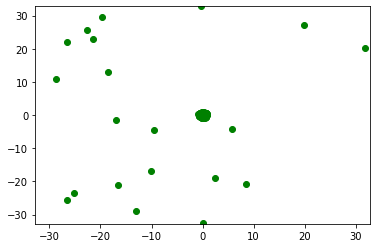

10000 Generation of the optimal solution: 
 0.0003


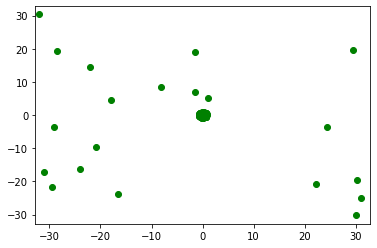

In [200]:
res = cuckoo_search(problem_range, sphere_func)

# ACKLEY FUNCTION

In [201]:
problem_range = [-32.768, 32.768]

In [202]:
def ackley_func(x, y):
    # optimal point == min(0, 0) = 0
    a, b, c = 20, 0.2, 2 * math.pi
    z = -a * np.exp(-b * np.sqrt(0.5 * (x ** 2 + y ** 2))) - np.exp(0.5 * (np.cos(c * x) + np.cos(c * y))) + np.e + a
    return np.fabs(z)

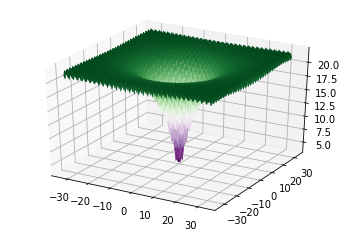

In [203]:
plot_tested_func(ackley_func, problem_range)

Initialization: 
 [-2.33997   0.521328] 
 8.003


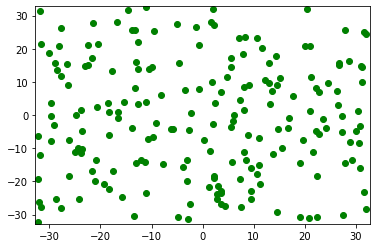

500 Generation of the optimal solution: 
 2.0737


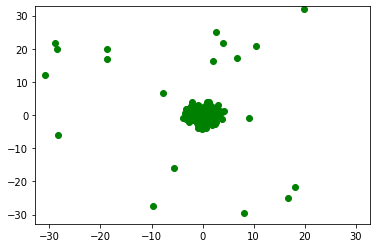

1000 Generation of the optimal solution: 
 1.4628593136704708


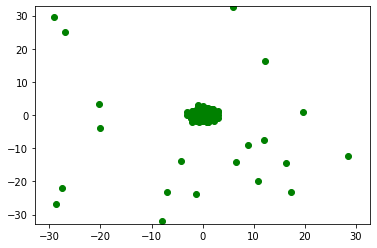

1500 Generation of the optimal solution: 
 1.4628593136704708


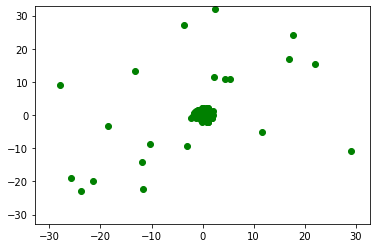

2000 Generation of the optimal solution: 
 1.0291


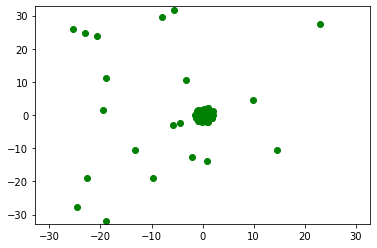

2500 Generation of the optimal solution: 
 1.0291


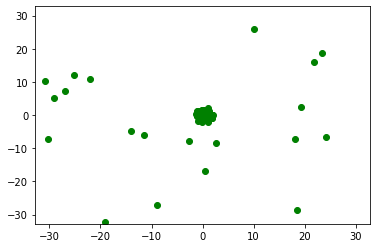

3000 Generation of the optimal solution: 
 1.0291


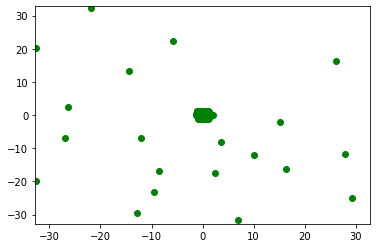

3500 Generation of the optimal solution: 
 1.0291


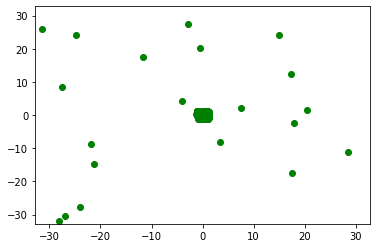

4000 Generation of the optimal solution: 
 1.0291


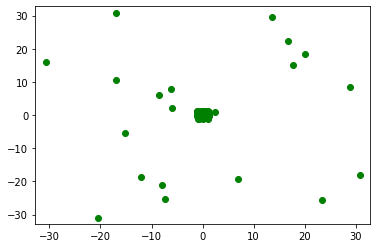

4500 Generation of the optimal solution: 
 1.0291


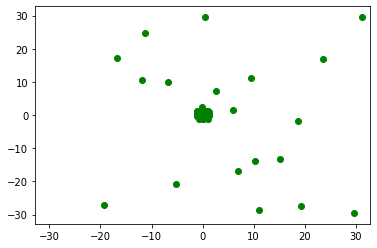

5000 Generation of the optimal solution: 
 1.0291


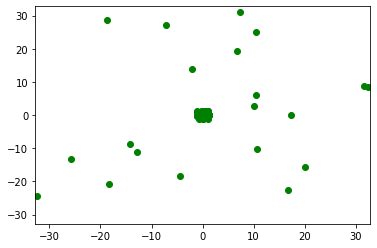

5500 Generation of the optimal solution: 
 0.1227


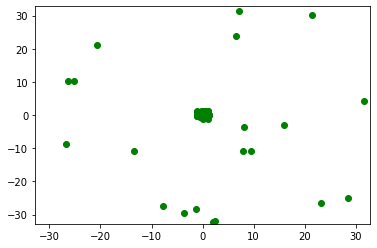

6000 Generation of the optimal solution: 
 0.1227


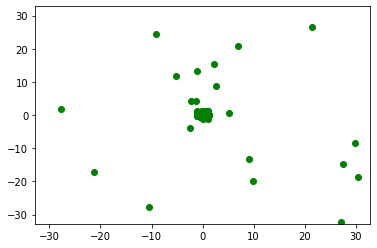

6500 Generation of the optimal solution: 
 0.1227


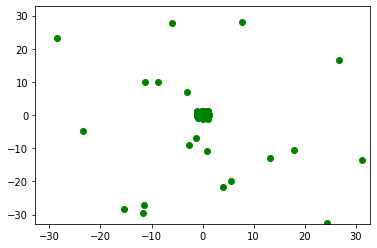

7000 Generation of the optimal solution: 
 0.099


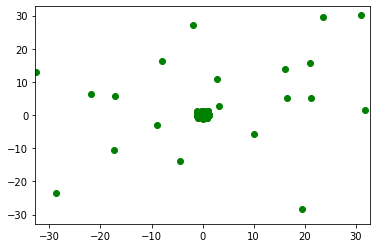

7500 Generation of the optimal solution: 
 0.099


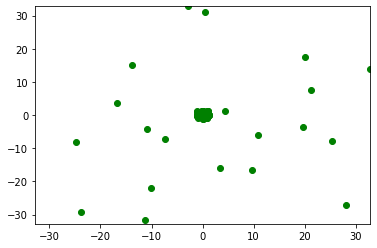

8000 Generation of the optimal solution: 
 0.099


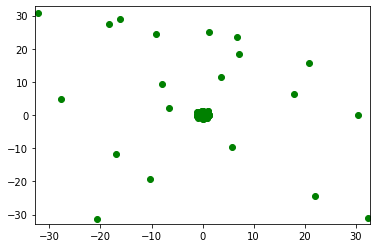

8500 Generation of the optimal solution: 
 0.099


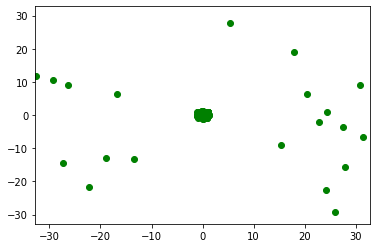

9000 Generation of the optimal solution: 
 0.099


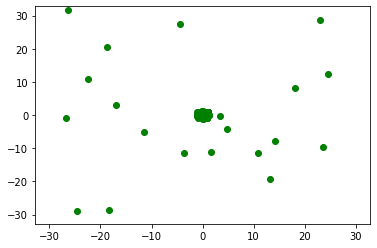

9500 Generation of the optimal solution: 
 0.099


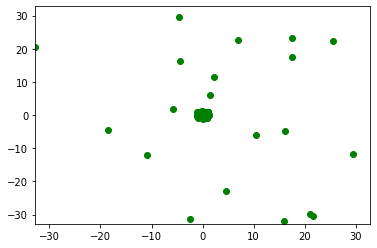

10000 Generation of the optimal solution: 
 0.099


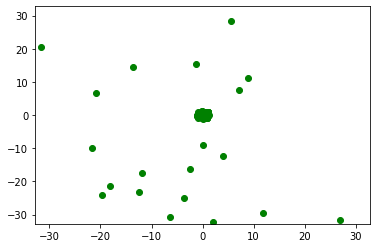

In [204]:
res = cuckoo_search(problem_range, ackley_func)

# GRIEWANK FUNCTION

In [205]:
plot_range = [-10, 10]

In [206]:
def griewank_func(x, y):
    # optimal point == min(0, 0) = 0
    z = (x**2/4000 + y**2/4000) - (np.cos(x)*np.cos(y/np.sqrt(2))) + 1
    return np.fabs(z)

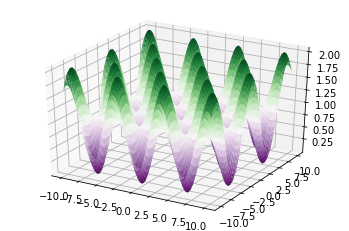

In [207]:
plot_tested_func(griewank_func, plot_range)

In [208]:
problem_range = [-600, 600]

Initialization: 
 [ 25.825657 -17.769587] 
 0.4763


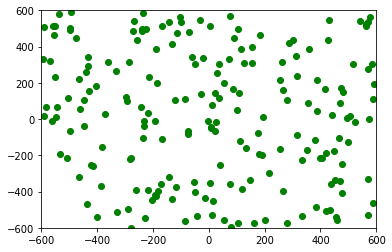

500 Generation of the optimal solution: 
 0.23309651088328232


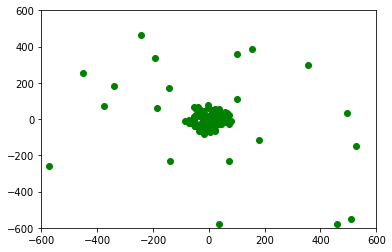

1000 Generation of the optimal solution: 
 0.06873970762124981


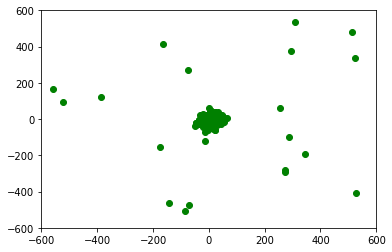

1500 Generation of the optimal solution: 
 0.05464207559721612


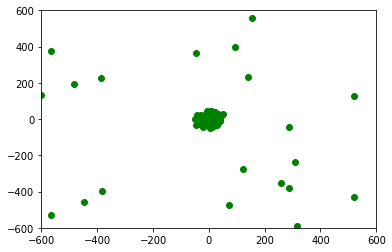

2000 Generation of the optimal solution: 
 0.05464207559721612


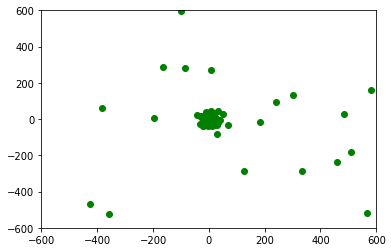

2500 Generation of the optimal solution: 
 0.05464207559721612


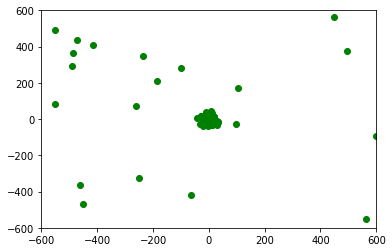

3000 Generation of the optimal solution: 
 0.05464207559721612


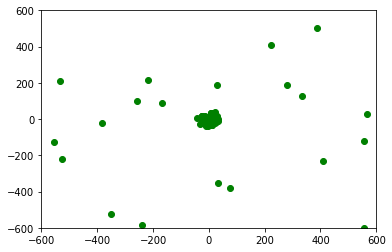

3500 Generation of the optimal solution: 
 0.05464207559721612


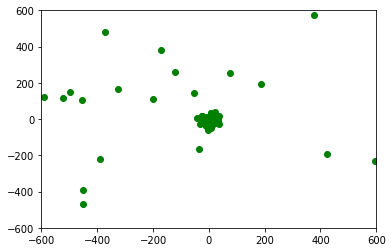

4000 Generation of the optimal solution: 
 0.05464207559721612


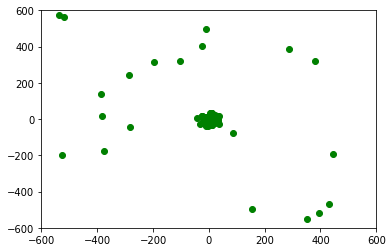

4500 Generation of the optimal solution: 
 0.05464207559721612


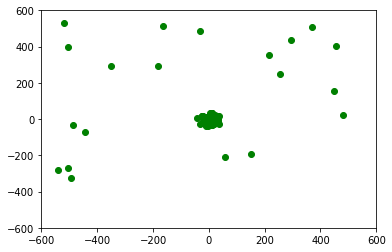

5000 Generation of the optimal solution: 
 0.05464207559721612


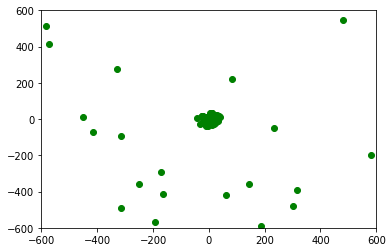

5500 Generation of the optimal solution: 
 0.05464207559721612


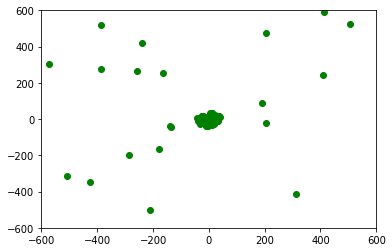

6000 Generation of the optimal solution: 
 0.05464207559721612


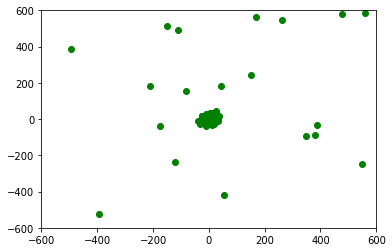

6500 Generation of the optimal solution: 
 0.0228


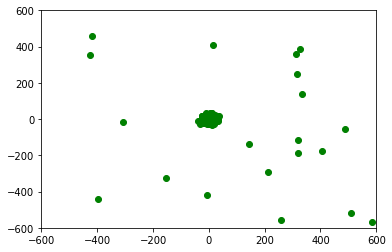

7000 Generation of the optimal solution: 
 0.0228


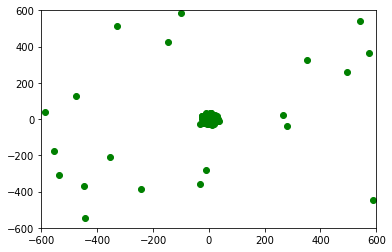

7500 Generation of the optimal solution: 
 0.0228


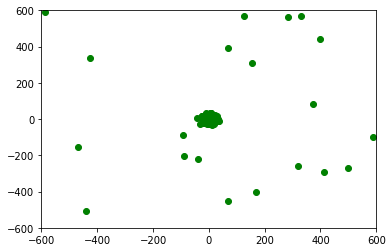

8000 Generation of the optimal solution: 
 0.0228


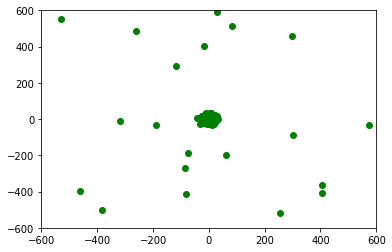

8500 Generation of the optimal solution: 
 0.0228


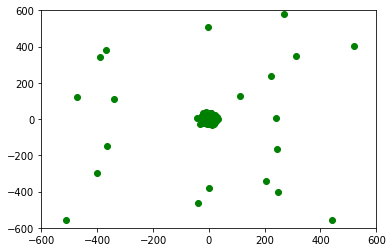

9000 Generation of the optimal solution: 
 0.0228


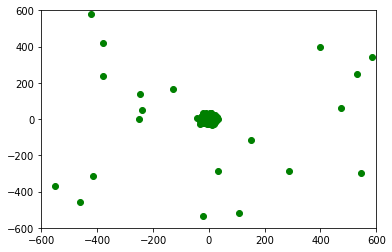

9500 Generation of the optimal solution: 
 0.0228


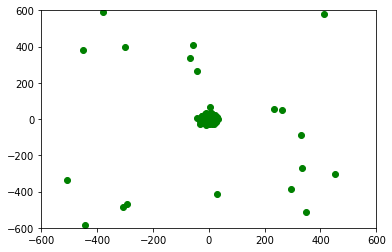

10000 Generation of the optimal solution: 
 0.0228


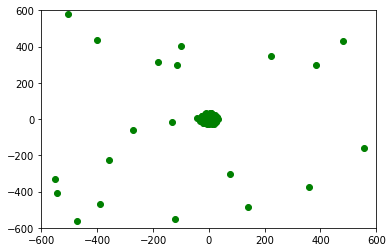

In [209]:
res = cuckoo_search(problem_range, griewank_func)

# RASTRIGIN FUNCTION

In [210]:
problem_ranges = [-5.12, 5.12]

In [211]:
def rastrigin_func(x, y):
    # optimal point == min(0, 0) = 0
    z = (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + 20
    return z

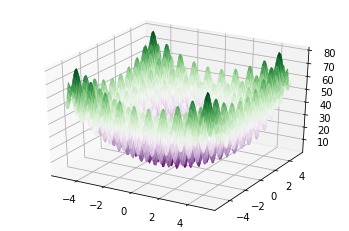

In [212]:
plot_tested_func(rastrigin_func, problem_ranges)

Initialization: 
 [ 0.995864 -1.896112] 
 6.6462


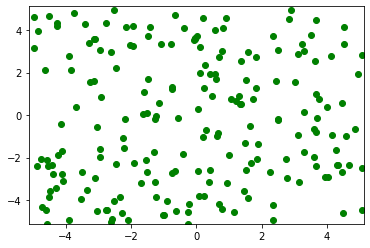

500 Generation of the optimal solution: 
 0.12258161693509706


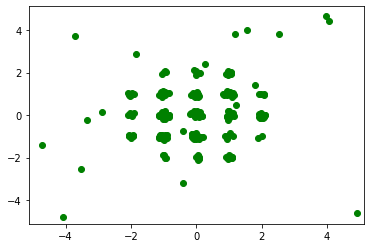

1000 Generation of the optimal solution: 
 0.12258161693509706


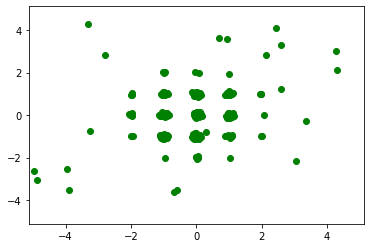

1500 Generation of the optimal solution: 
 0.12258161693509706


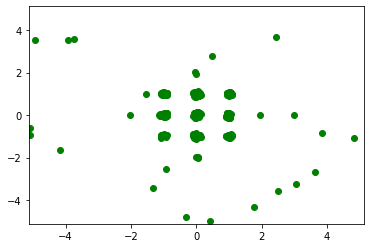

2000 Generation of the optimal solution: 
 0.065


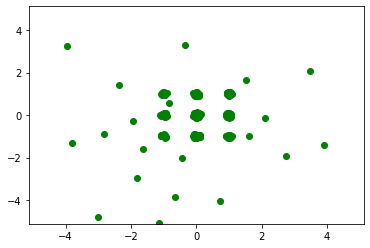

2500 Generation of the optimal solution: 
 0.065


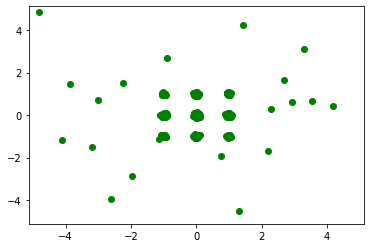

3000 Generation of the optimal solution: 
 0.065


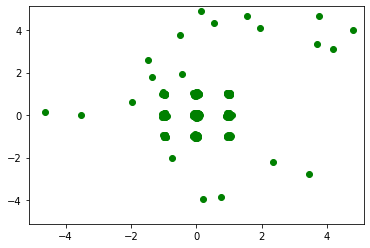

3500 Generation of the optimal solution: 
 0.065


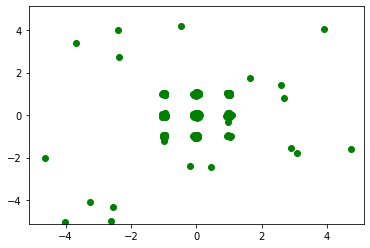

4000 Generation of the optimal solution: 
 0.0027


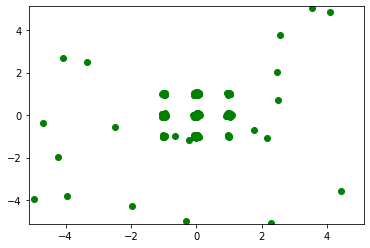

4500 Generation of the optimal solution: 
 0.0027


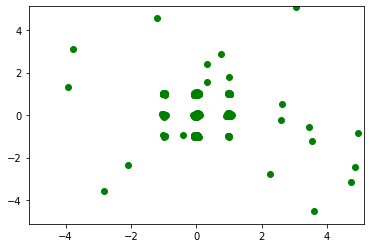

5000 Generation of the optimal solution: 
 0.0027


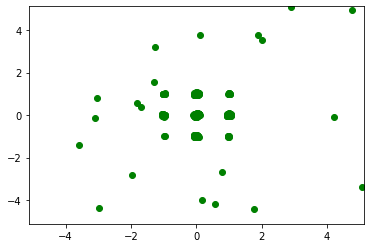

5500 Generation of the optimal solution: 
 0.0027


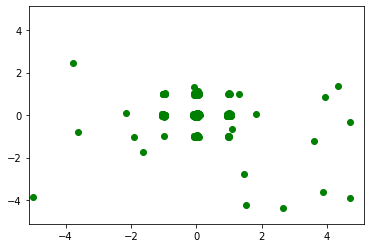

6000 Generation of the optimal solution: 
 0.0027


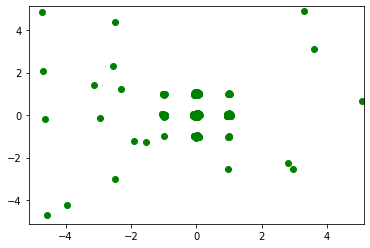

6500 Generation of the optimal solution: 
 0.0027


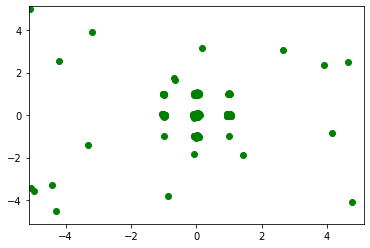

7000 Generation of the optimal solution: 
 0.0027


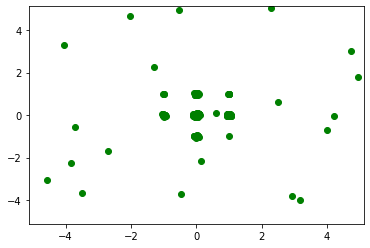

7500 Generation of the optimal solution: 
 0.0027


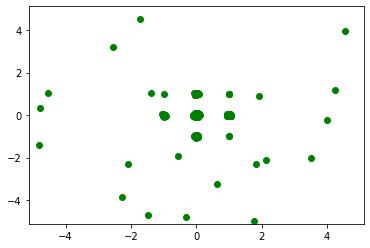

8000 Generation of the optimal solution: 
 0.0027


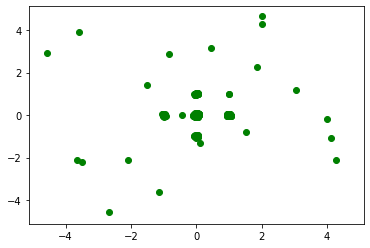

8500 Generation of the optimal solution: 
 0.0027


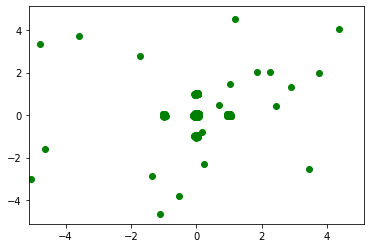

9000 Generation of the optimal solution: 
 0.0027


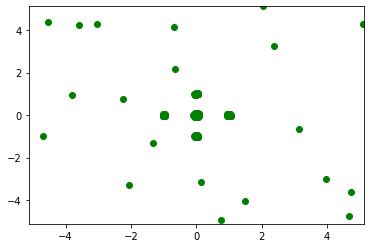

9500 Generation of the optimal solution: 
 0.0027


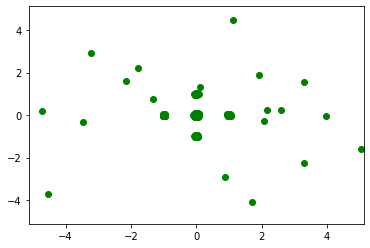

10000 Generation of the optimal solution: 
 0.0027


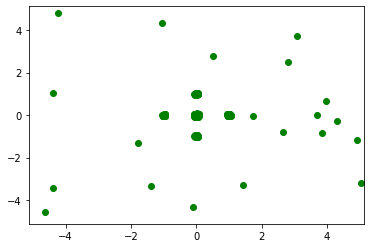

In [213]:
res = cuckoo_search(problem_ranges, rastrigin_func)

# ROSENBROCK FUNCTION

In [214]:
plot_range = [-10, 10]
problem_ranges = [-5, 10]

In [215]:
def rosenbrock_func(x, y):
    # optimal point == min(1, 1) = 0
    z = 100 * (y - x**2)**2 + (x - 1)**2
    return z

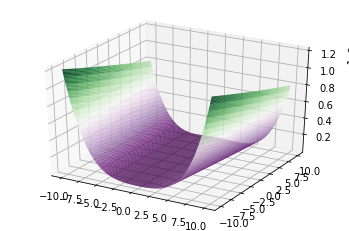

In [216]:
plot_tested_func(rosenbrock_func, plot_range)

Initialization: 
 [1.482112 2.330134] 
 2.0141


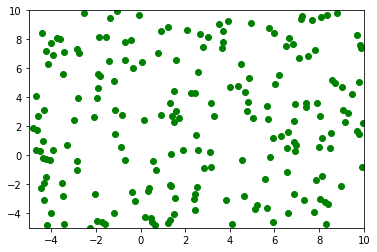

500 Generation of the optimal solution: 
 0.0936


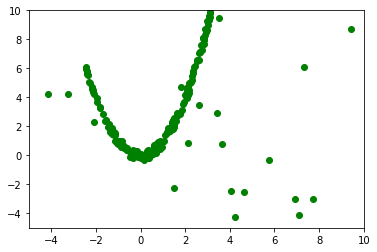

1000 Generation of the optimal solution: 
 0.0034


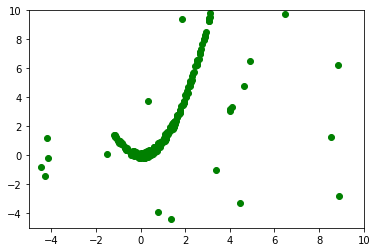

1500 Generation of the optimal solution: 
 0.0034


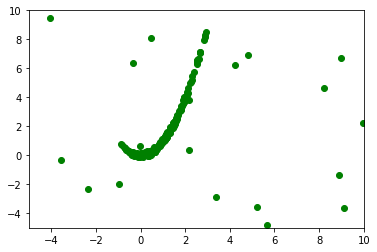

2000 Generation of the optimal solution: 
 0.0034


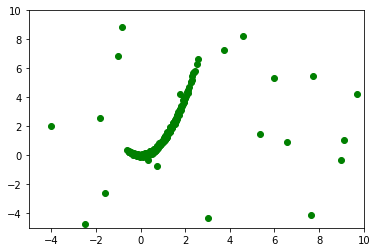

2500 Generation of the optimal solution: 
 0.0034


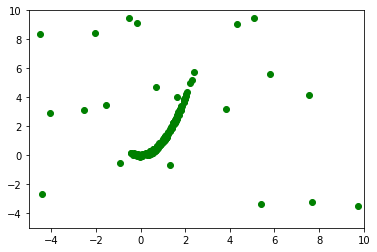

3000 Generation of the optimal solution: 
 0.0034


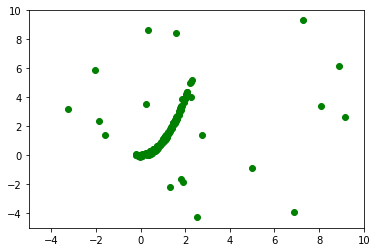

3500 Generation of the optimal solution: 
 0.0034


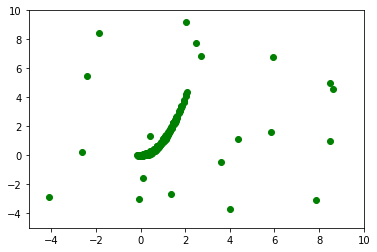

4000 Generation of the optimal solution: 
 0.0034


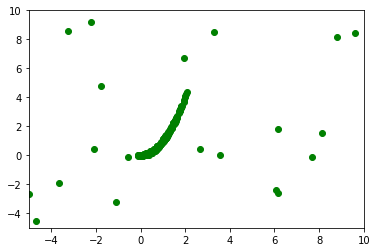

4500 Generation of the optimal solution: 
 0.0034


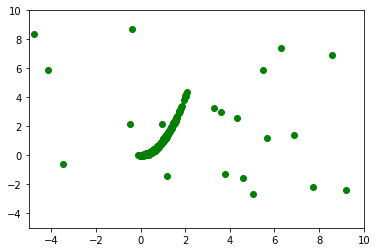

5000 Generation of the optimal solution: 
 0.0003


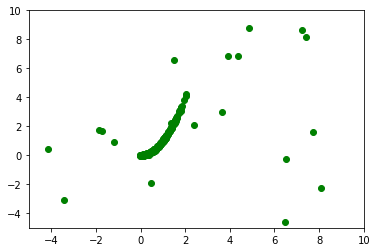

5500 Generation of the optimal solution: 
 0.0003


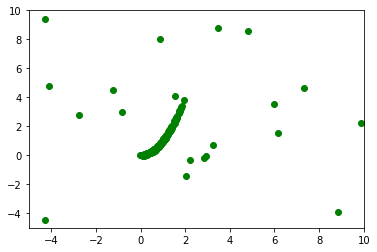

6000 Generation of the optimal solution: 
 0.0003


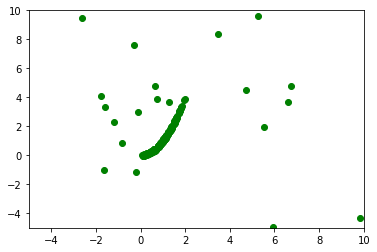

6500 Generation of the optimal solution: 
 0.0003


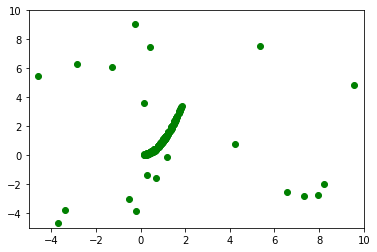

7000 Generation of the optimal solution: 
 0.0003


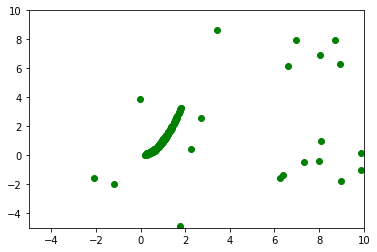

7500 Generation of the optimal solution: 
 0.0003


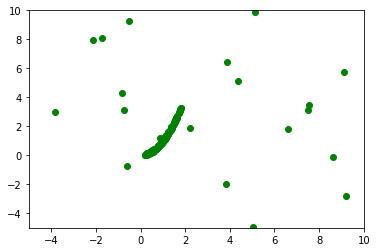

8000 Generation of the optimal solution: 
 0.0003


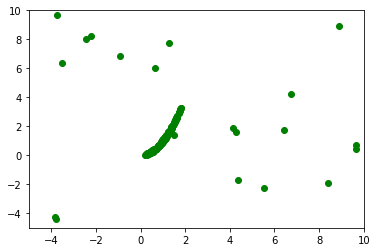

8500 Generation of the optimal solution: 
 0.0003


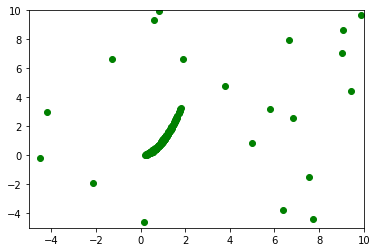

9000 Generation of the optimal solution: 
 0.0003


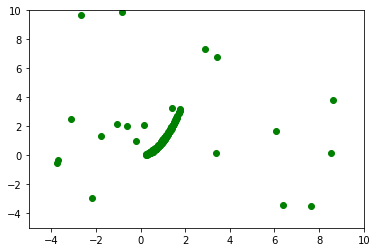

9500 Generation of the optimal solution: 
 0.0003


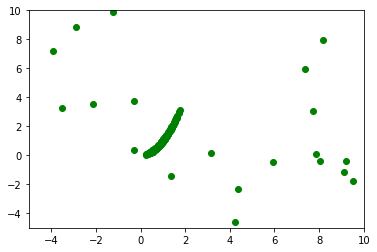

10000 Generation of the optimal solution: 
 0.0003


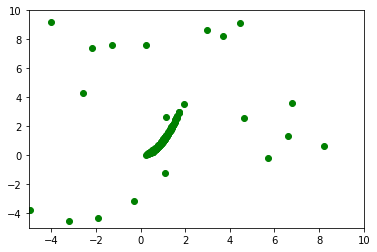

In [217]:
res = cuckoo_search(problem_ranges, rosenbrock_func)

# Dependency of the convergence rate on the population size

In [218]:
nest_counts = [a for a in range(100, 500, 50)]

In [219]:
solutions = []
problem_range = [-10, 10]
for nest_count in nest_counts:
    solution = cuckoo_search(problem_range, ackley_func, nest_count, visualize=False)
    solutions.append((nest_count, solution))

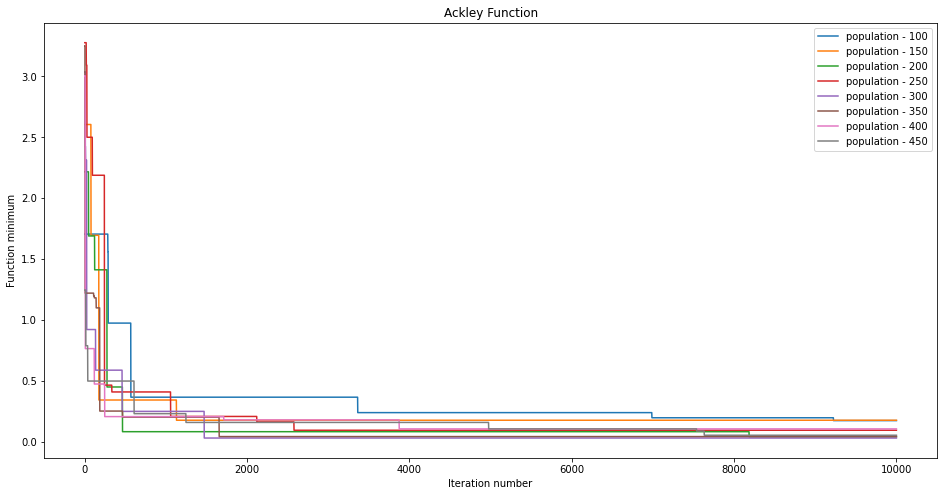

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

legend = []

for p, s in solutions:
    ax.plot(s)
    legend.append(f'population - {p}')
    
ax.legend(legend)

ax.set(xlabel='Iteration number', ylabel='Function minimum', title='Ackley Function')
plt.show()